# Data Science Internship

# Task 3:Employee Turnover Prediction

Name-Gayatri Vivek Ballal

In [1]:
#Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline
import warnings                        
warnings.filterwarnings("ignore")

In [2]:
#To read the dataset
df=pd.read_csv("C:/Users/HP/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
#for getting information about variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [4]:
#To get count of attrition(Yes and No) 
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [5]:
df['Attrition'].replace(to_replace=['Yes'],value=1,inplace=True)
df['Attrition'].replace(to_replace=['No'],value=0,inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [6]:
#To calculate correlation
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot: >

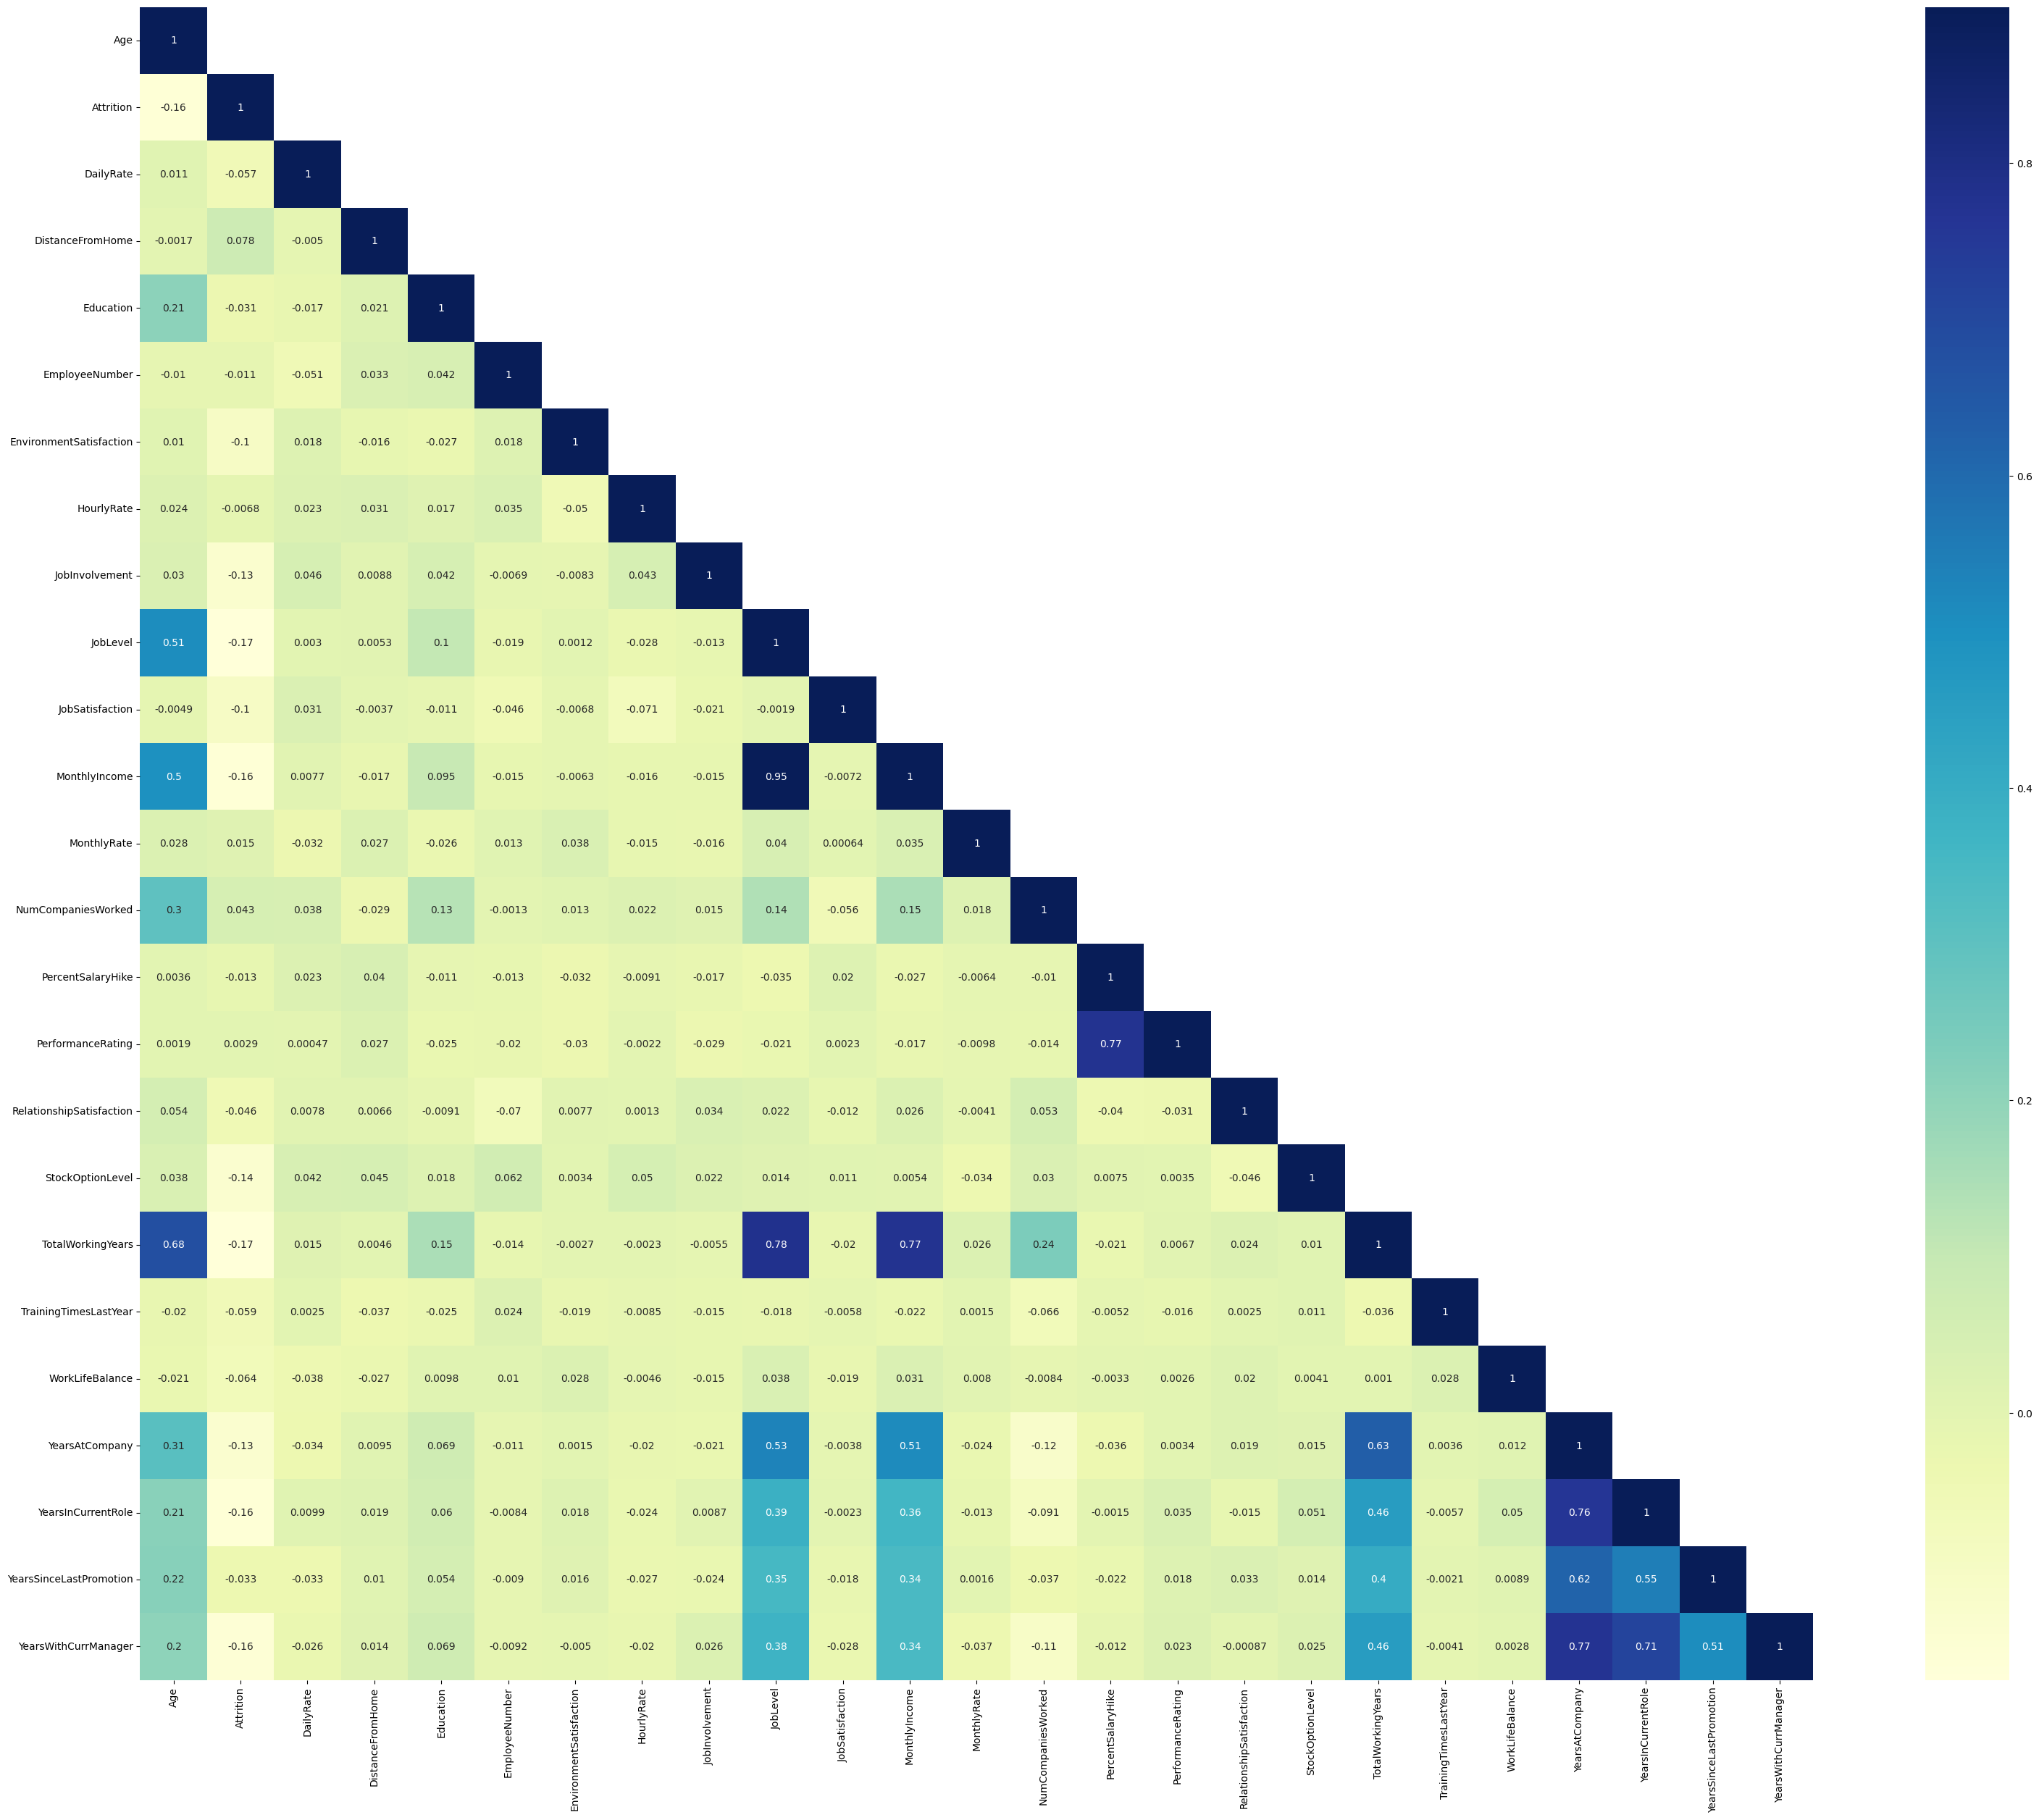

In [7]:
#To plot correlation matrix
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(40,30)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [8]:
#To describe statistical measures
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
#To encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['BusinessTravel'])
df.drop("BusinessTravel", axis=1, inplace=True)
df["BusinessTravel"] = label
label = le.fit_transform(df['Department'])
df.drop("Department", axis=1, inplace=True)
df["Department"] = label
label = le.fit_transform(df['EducationField'])
df.drop("EducationField", axis=1, inplace=True)
df["EducationField"] = label
label = le.fit_transform(df['Gender'])
df.drop("Gender", axis=1, inplace=True)
df["Gender"] = label
label = le.fit_transform(df['JobRole'])
df.drop("JobRole", axis=1, inplace=True)
df["JobRole"] = label
label = le.fit_transform(df['MaritalStatus'])
df.drop("MaritalStatus", axis=1, inplace=True)
df["MaritalStatus"] = label
label = le.fit_transform(df['OverTime'])
df.drop("OverTime", axis=1, inplace=True)
df["OverTime"] = label

In [10]:
col_names = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [11]:
feature_cols = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
x = df[feature_cols] # Features
y = df.Attrition # Target variable

# Logistic Regression before oversampling

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [14]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [15]:
print("Coeff:", model.coef_)
print("Intercept:", model.intercept_)

Coeff: [[-1.79520364e-02  3.14096185e-07 -3.23154426e-04  7.28385838e-03
   4.99903170e-02  1.67463169e-03  6.31588577e-03 -5.21779666e-05
  -1.69983661e-02  2.52435578e-03 -1.84869256e-03 -1.63907107e-02
  -2.99630116e-03  2.71465894e-02 -2.21028340e-02  2.28117091e-02
  -6.52186995e-05  2.04245366e-06  5.00726552e-02  2.39756061e-02
  -1.33814147e-02 -7.60605473e-04 -3.52197080e-03 -2.41049145e-02
  -1.44054653e-02 -1.51170104e-02 -8.79866715e-03 -2.12923659e-02
  -5.40494128e-02  2.62817449e-02 -4.39584989e-02]]
Intercept: [-0.00022337]


In [16]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)
y_train_predict_df = pd.DataFrame(y_train_predict)
df_y_train = pd.concat([x_train,y_train_predict_df],axis=1)
df_y_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,0
1097,24.0,2.0,350.0,1.0,21.0,2.0,5.0,1551.0,3.0,1.0,...,2.0,3.0,2.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0
727,18.0,0.0,287.0,1.0,5.0,2.0,1.0,1012.0,2.0,1.0,...,4.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
254,29.0,2.0,1247.0,2.0,20.0,2.0,2.0,349.0,4.0,1.0,...,4.0,1.0,10.0,2.0,3.0,3.0,2.0,0.0,2.0,0.0
1175,39.0,2.0,492.0,1.0,12.0,3.0,3.0,1654.0,4.0,1.0,...,3.0,0.0,7.0,3.0,3.0,5.0,4.0,1.0,0.0,0.0
1341,31.0,2.0,311.0,1.0,20.0,3.0,1.0,1881.0,2.0,1.0,...,1.0,1.0,10.0,2.0,3.0,10.0,8.0,0.0,2.0,NaN


In [17]:
results = confusion_matrix(y_train,y_train_predict)
print("confusion matrix - Train:\n", results)
print("accuracy score - Train:\n", accuracy_score(y_train,y_train_predict))
print("classifcation report - Train :\n",classification_report(y_train,y_train_predict))

confusion matrix - Train:
 [[976   2]
 [190   8]]
accuracy score - Train:
 0.8367346938775511
classifcation report - Train :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       978
           1       0.80      0.04      0.08       198

    accuracy                           0.84      1176
   macro avg       0.82      0.52      0.49      1176
weighted avg       0.83      0.84      0.77      1176



In [18]:
results = confusion_matrix(y_test,y_test_predict)
print("confusion matrix - Test:\n", results)

confusion matrix - Test:
 [[255   0]
 [ 39   0]]


In [19]:
print("Accuracy score - Test:", (results[0][0] + results[1][1]) / sum(sum(results)))

Accuracy score - Test: 0.8673469387755102


Area Under Curve: 0.5


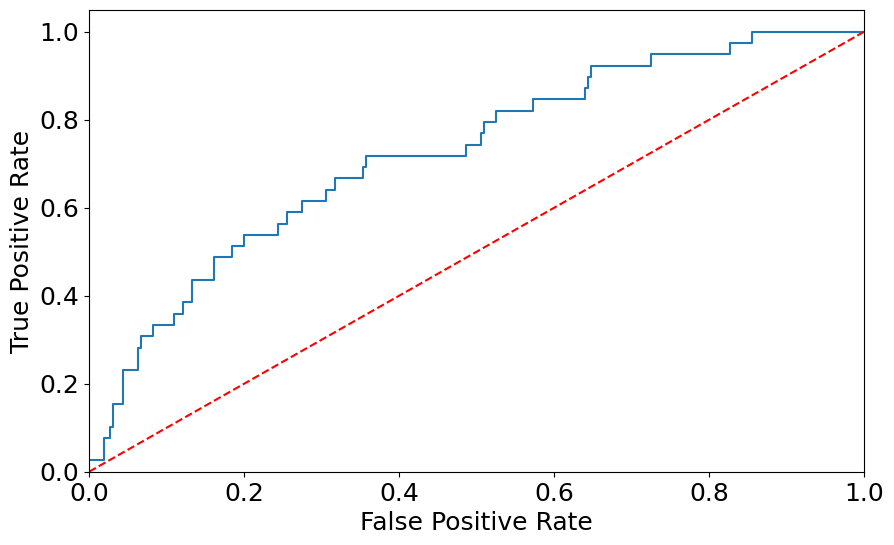

In [20]:
#ROC curve
plt.rc("font",size=18)
auc = roc_auc_score(y_test, model.predict(x_test))
print("Area Under Curve:",auc)
false_positive, true_positive, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(false_positive, true_positive, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('Log_ROC')
plt.show()

In [21]:
print("precision (TP / TP + FP):", (results[0][0] / (results[0][0] + results[1][0])))

precision (TP / TP + FP): 0.8673469387755102


In [22]:
print("recall (TP / TP + FN):", (results[0][0] / (results[0][0] + results[0][1])))
print("classifcation report - Test :\n",classification_report(y_test,y_test_predict))
print("False Positive Rate - Test:",results[1][0] / (results[1][0] + results[1][1]))
print("True Positive Rate - Test:",results[0][0] / (results[0][0] + results[0][1]))

recall (TP / TP + FN): 1.0
classifcation report - Test :
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

False Positive Rate - Test: 1.0
True Positive Rate - Test: 1.0


# Oversampling

In [23]:
pip install imbalanced-learn


[notice] A new release of pip available: 22.2.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from collections import Counter

In [25]:
ros=RandomOverSampler(random_state=42)
x_res,y_res=ros.fit_resample(x,y)
print(sorted(Counter(y_res).items()),y_res.shape)

[(0, 1233), (1, 1233)] (2466,)


# Logistic Regression after Oversampling

In [26]:
from sklearn.linear_model import LogisticRegression 

In [27]:
from sklearn.model_selection import train_test_split
x_restrain, x_restest, y_restrain, y_restest = train_test_split( x_res, y_res, test_size=0.2, random_state=42)

In [28]:
model = LogisticRegression()
model.fit(x_restrain,y_restrain)

LogisticRegression()

In [29]:
print("Coeff:", model.coef_)
print("Intercept:", model.intercept_)

Coeff: [[ 1.35094462e-02  1.15955564e-02 -2.83561681e-04  2.12493903e-02
   3.00446001e-02  1.27031325e-02  1.17108034e-02 -1.51179935e-05
  -3.58828202e-02  4.71639092e-03 -6.33687486e-03 -2.57172376e-02
  -1.56719341e-03  7.69675794e-02 -2.09729432e-02  4.74507379e-02
  -7.72698820e-05 -8.11575166e-06  8.43599742e-02  4.25438637e-02
   3.87208497e-02  1.38961865e-02 -5.28333520e-03 -3.78813820e-02
  -3.15142329e-02 -1.88641516e-02 -3.40978240e-03  8.32023600e-03
  -6.91269061e-02  5.39632666e-02 -6.73228263e-02]]
Intercept: [0.00453626]


In [30]:
y_restrain_predict = model.predict(x_restrain)
y_restest_predict = model.predict(x_restest)
y_restrain_predict_df = pd.DataFrame(y_restrain_predict)
df_y_restrain = pd.concat([x_restrain,y_restrain_predict_df],axis=1)
df_y_restrain.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,0
463,26.0,2.0,471.0,1.0,24.0,3.0,5.0,622.0,3.0,1.0,...,2.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0
1037,45.0,2.0,1448.0,1.0,29.0,3.0,5.0,1465.0,2.0,1.0,...,4.0,2.0,10.0,4.0,4.0,3.0,1.0,1.0,2.0,1.0
1114,48.0,2.0,1108.0,1.0,15.0,4.0,4.0,1576.0,3.0,0.0,...,4.0,1.0,10.0,3.0,2.0,8.0,2.0,7.0,6.0,0.0
1503,34.0,0.0,1362.0,2.0,19.0,3.0,2.0,502.0,1.0,1.0,...,2.0,0.0,9.0,3.0,2.0,5.0,2.0,0.0,4.0,1.0
1818,48.0,1.0,708.0,2.0,7.0,2.0,3.0,1691.0,4.0,0.0,...,3.0,2.0,19.0,3.0,3.0,9.0,7.0,7.0,7.0,1.0


In [31]:
results = confusion_matrix(y_restrain,y_restrain_predict)
print("confusion matrix - Train:\n", results)
print("accuracy score - Train:\n", accuracy_score(y_restrain,y_restrain_predict))
print("classifcation report - Train :\n",classification_report(y_restrain,y_restrain_predict))

confusion matrix - Train:
 [[594 389]
 [292 697]]
accuracy score - Train:
 0.6546653144016227
classifcation report - Train :
               precision    recall  f1-score   support

           0       0.67      0.60      0.64       983
           1       0.64      0.70      0.67       989

    accuracy                           0.65      1972
   macro avg       0.66      0.65      0.65      1972
weighted avg       0.66      0.65      0.65      1972



In [32]:
results = confusion_matrix(y_restest,y_restest_predict)
print("confusion matrix - Test:\n", results)

confusion matrix - Test:
 [[148 102]
 [ 92 152]]


In [33]:
print("Accuracy score - Test:", (results[0][0] + results[1][1]) / sum(sum(results)))

Accuracy score - Test: 0.6072874493927125


Area Under Curve: 0.6074754098360656


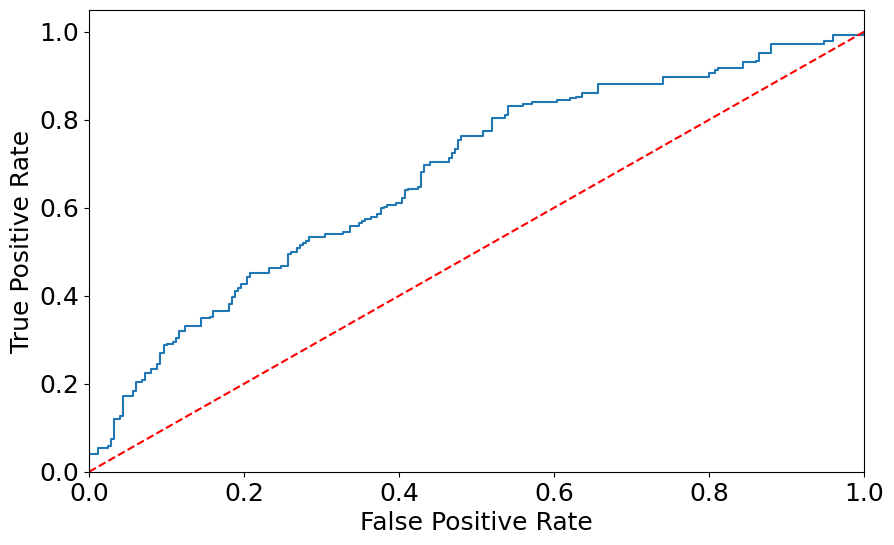

In [34]:
#ROC Curve
plt.rc("font",size=18)
auc = roc_auc_score(y_restest, model.predict(x_restest))
print("Area Under Curve:",auc)
false_positive, true_positive, thresholds = roc_curve(y_restest, model.predict_proba(x_restest)[:,1])
plt.figure(figsize=(10,6))
plt.plot(false_positive, true_positive, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('Log_ROC')
plt.show()

# Random forest

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=125, stratify=y)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
clf = RandomForestClassifier(n_estimators=10,random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [38]:
model.score(x_test, y_test)

0.6054421768707483

In [39]:
y_predicted = model.predict(x_test)
y_predicted 

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[143, 104],
       [ 12,  35]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.58      0.71       247
           1       0.25      0.74      0.38        47

    accuracy                           0.61       294
   macro avg       0.59      0.66      0.54       294
weighted avg       0.82      0.61      0.66       294



In [42]:
clf = RandomForestClassifier(n_estimators=10,random_state=0)

Text(35.722222222222214, 0.5, 'Truth')

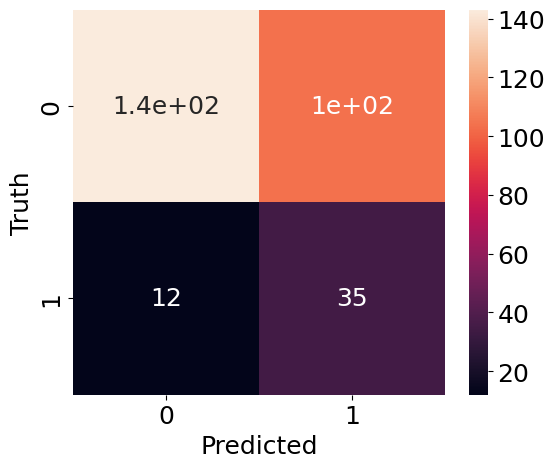

In [43]:
#Confusion matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# K Nearest Neighbour

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.8163265306122449 


In [45]:
y_pred = knn.predict(x_test)
y_true=y_test

In [46]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_true, y_pred)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       247
           1       0.35      0.17      0.23        47

    accuracy                           0.82       294
   macro avg       0.60      0.55      0.56       294
weighted avg       0.77      0.82      0.79       294



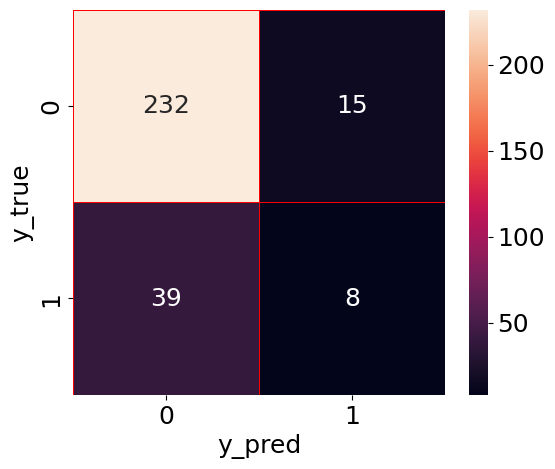

In [48]:
#Confusion matrix
import seaborn as sns 
f, ax =plt.subplots(figsize = (6,5))
sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# SVM

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics

In [50]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [51]:
svc = SVC(C=1.0, random_state=1, kernel='linear')

In [52]:
svc.fit(x_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [53]:
y_predict = svc.predict(x_test_std)

In [54]:
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.878


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.79      0.32      0.45        47

    accuracy                           0.88       294
   macro avg       0.84      0.65      0.69       294
weighted avg       0.87      0.88      0.85       294



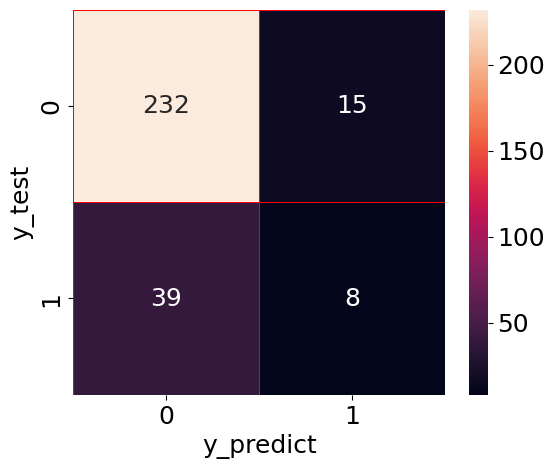

In [56]:
#Confusion matrix
import seaborn as sns 
f, ax =plt.subplots(figsize = (6,5))
sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_predict")
plt.ylabel("y_test")
plt.show()

Accuracy of SVM is greater among all classifiers.So, SVM model is best fitted model to the data that can predict which
employees are most likely to leave the company.